# W51CA3 2DGaussian Fitting

#### ALMA Band 6 (1 mm = 226 GHz) continuum
`/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits`

In [3]:
directory1 = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'

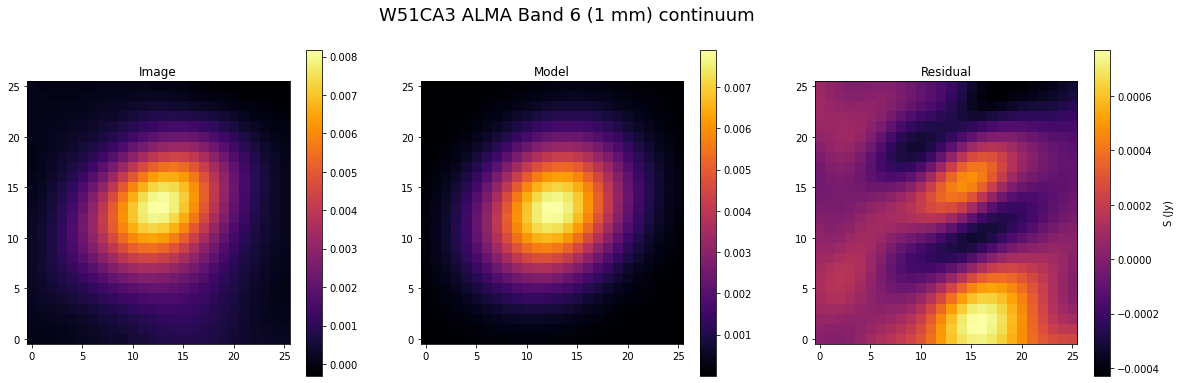

Parameter Error

7.949175317e-03 2.537724792e-04

2.90917076e+02 1.224428804e-07

1.45182376e+01 1.211903920e-07

3.577235901e-06 1.176348935e-07

4.368343544e-06 1.261432863e-07

9.1616016e-01 3.332209776e-01



In [7]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='fits')
cube = cube[0,:,:]
x, y = 3295, 3580
size = 13

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=0.03 * (u.Jy/u.beam),
                                   x_stddev=1.111111e-5 * u.degree, y_stddev=1.111111e-5 * u.degree, theta=1.5*u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout



with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)


p_init_gauss2D.theta.fixed = True

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

              
plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 6 (1 mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

#saveplotfig_gaussianfit()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

#### ALMA Band 3 (3mm) continuum

`/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0`

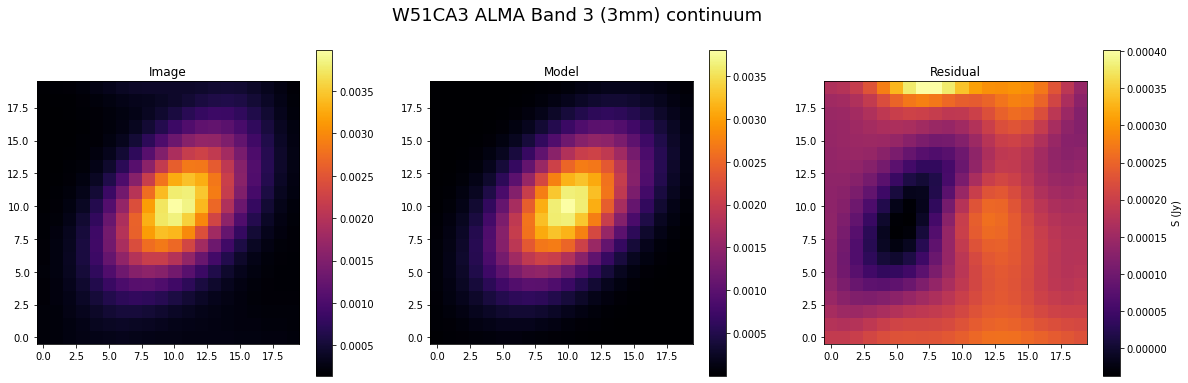

Parameter Error

3.811051773e-03 2.267848e-04

2.909170744e+02 1.616962261e-09

1.451823444e+01 1.617457664e-09

5.279388137e-06 1.195947022e-09

8.613201664e-06 1.963088210e-09

7.852286645e-01 3.158709533e-04



In [3]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook

import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 7047, 7342
size = 10

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev=(0.019) * u.arcsec, y_stddev=(0.031) * u.arcsec, theta = (np.pi/4) * u.rad)

fit_p = fitting.LevMarLSQFitter()


cube_cutout_quant = cube_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)

cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 ALMA Band 3 (3mm) continuum", fontsize=18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

In [5]:
cube = SpectralCube.read(directory1, format='casa_image')
cube[0].header

BMAJ    = 1.83491574393378E-05                                                  
BMIN    = 1.16157842179139E-05                                                  
NAXIS   =                    2                                                  
NAXIS1  =                14500                                                  
NAXIS2  =                14500                                                  
BPA     =   -44.63588714599609                                                  
FILENAME= '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0th&'
CONTINUE  'ru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'    
BUNIT   = 'beam-1 Jy'                                                           
BEAM    = 'Beam: BMAJ=0.06605696678161621 arcsec BMIN=0.041816823184490204 &'   
CONTINUE  'arcsec BPA=-44.635887145996094 deg'                                  
SLICE   = '[[0, (None, None, None), (None, None, None)]]'                       
WCSAXES =                   

#### VLA Q-band (0.7 cm = 46.99 GHz) continuum
`/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0`

In [73]:
directory3 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'

cube = SpectralCube.read(directory3, format='casa_image')

cube[0].header

BMAJ    = 1.37144678996668E-05                                                  
BMIN    = 9.80091074274645E-06                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 8000                                                  
NAXIS2  =                 8000                                                  
BPA     =   -66.64144897460938                                                  
FILENAME= '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAar&'
CONTINUE  'ray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_fi&'
CONTINUE  'nal.image.tt0'                                                       
BUNIT   = 'beam-1 Jy'                                                           
BEAM    = 'Beam: BMAJ=0.04937208443880081 arcsec BMIN=0.03528327867388725 &'    
CONTINUE  'arcsec BPA=-66.64144897460938 deg'                                   
SLICE   = '[[0, (None, None,

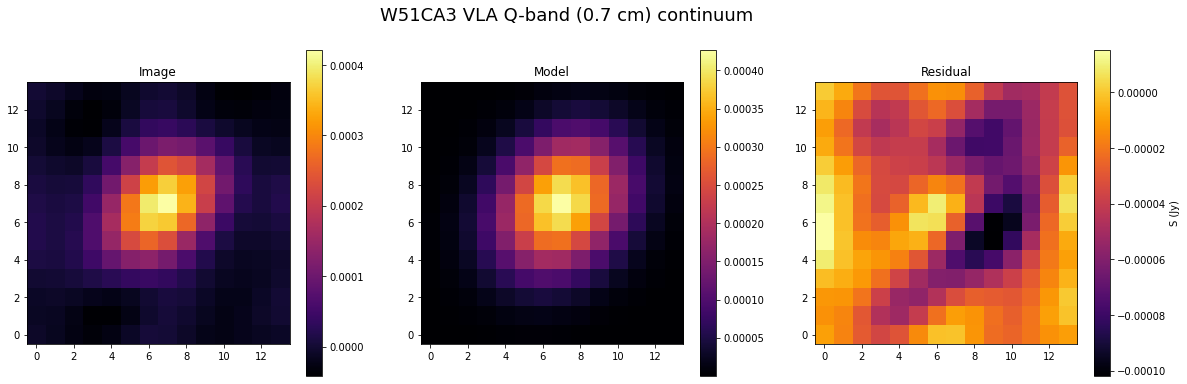

Parameter Error

4.268737657e-04 6.943419781e-05

2.909170738e+02 4.554571602e-10

1.451823611e+01 4.555215671e-10

5.832775501e-06 4.050659912e-10

7.221682236e-06 5.020557301e-10

7.854755934e-01 2.284882702e-04



In [4]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube, Projection
from astropy.io import fits
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
from astropy import units as u

from astropy.visualization import quantity_support

sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
from quicklook_multicolorbar import quicklook

import pylab as pl

#Saving methods
directory1 = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'

#Accessing Cube Data
cube = SpectralCube.read(directory1, format='casa_image')
cube = cube[0,:,:]
x, y = 3922, 4023
size = 7

cube_cutout = cube[y - size:y + size, x - size:x + size]
yy, xx = cube_cutout.spatial_coordinate_map

cord = cube.world[y,x]

p_init_gauss2D = models.Gaussian2D(x_mean=cord[1], y_mean=cord[0], amplitude=1 * (u.Jy/u.beam),
                                   x_stddev= (0.021) * u.arcsec, y_stddev=(0.026) * u.arcsec, theta = (np.pi/4) * u.rad)
#p_init_gauss2D.amplitude.fixed = True

fit_p = fitting.LevMarLSQFitter()

cube_cutout_quant = cube_cutout

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    p_gauss2D = fit_p(p_init_gauss2D, xx, yy, cube_cutout_quant)
    
cov = np.diag(fit_p.fit_info['param_cov'])
errors = np.sqrt(cov)

amplitude_error=np.format_float_scientific(errors[0],precision=9)
x_mean_error=np.format_float_scientific(errors[1],precision=9)
y_mean_error=np.format_float_scientific(errors[2],precision=9)
x_stddev_error=np.format_float_scientific(errors[3],precision=9)
y_stddev_error=np.format_float_scientific(errors[4],precision=9)
theta_error=np.format_float_scientific(errors[5],precision=9)

amplitude = np.format_float_scientific(p_gauss2D.amplitude[0],precision=9)
x_mean = np.format_float_scientific(p_gauss2D.x_mean[0],precision=9)
y_mean = np.format_float_scientific(p_gauss2D.y_mean[0],precision=9)
x_stddev = np.format_float_scientific(p_gauss2D.x_stddev[0],precision=9)
y_stddev = np.format_float_scientific(p_gauss2D.y_stddev[0],precision=9)
theta = np.format_float_scientific(p_gauss2D.theta[0],precision=9)

plt.figure(figsize=(20, 6))
plt.suptitle("W51CA3 VLA Q-band (0.7 cm) continuum",fontsize = 18)

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(cube_cutout.value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Model")
plt.imshow(p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Residual")
plt.imshow(cube_cutout.value - p_gauss2D(xx, yy).value, origin='lower', cmap='inferno')
plt.colorbar(label='S (Jy)')

plt.show()

print("Parameter" + ' ' + 'Error' +"\n")
print(amplitude + ' ' + amplitude_error +"\n")
print(x_mean + ' ' + x_mean_error +"\n")
print(y_mean + ' ' + y_mean_error +"\n")
print(x_stddev + ' ' + x_stddev_error +"\n")
print(y_stddev + ' ' + y_stddev_error +"\n")
print(theta + ' ' + theta_error +"\n")

## FK5 ICRS Conversion

In [87]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').fk5

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (290.93770833, 17.50833333)>

In [89]:
from astropy import coordinates, units as u

coordinates.SkyCoord('19:23:45.05','17:30:30', unit=(u.hour, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (290.93770209, 17.50832727)>

#### Finding the Coordinate System for Each FITS

In [6]:
ALMA_Band_6_dir = '/orange/adamginsburg/w51/FITS/W51n_cont_briggsSC_tclean.image.fits'
ALMA_Band_3_dir = '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'
VLA_QBand_dir = '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAarray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_final.image.tt0'

cube1   = SpectralCube.read(ALMA_Band_6_dir, format='fits')
cube2   = SpectralCube.read(ALMA_Band_3_dir, format='casa_image')
cube3   = SpectralCube.read(VLA_QBand_dir, format='casa_image')

In [7]:
cube1[0].header

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    2                                                  
NAXIS1  =                 7056                                                  
NAXIS2  =                 7056                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   9.238974501689E-06                                                  
BMIN    =   6.774385045800E-06                                                  
BPA     =  -4.700330352783E+01                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = '        '        

In [8]:
cube2[0].header

BMAJ    = 1.83491574393378E-05                                                  
BMIN    = 1.16157842179139E-05                                                  
NAXIS   =                    2                                                  
NAXIS1  =                14500                                                  
NAXIS2  =                14500                                                  
BPA     =   -44.63588714599609                                                  
FILENAME= '/orange/adamginsburg/w51/2017.1.00293.S/may2021_imaging/w51n.spw0th&'
CONTINUE  'ru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0'    
BUNIT   = 'beam-1 Jy'                                                           
BEAM    = 'Beam: BMAJ=0.06605696678161621 arcsec BMIN=0.041816823184490204 &'   
CONTINUE  'arcsec BPA=-44.635887145996094 deg'                                  
SLICE   = '[[0, (None, None, None), (None, None, None)]]'                       
WCSAXES =                   

The VLA data is in FK5. The parameters of the Gaussian fit will be converted from FK5 to ICRS for the VLA continuum data.

In [11]:
cube3[0].header

BMAJ    = 1.37144678996668E-05                                                  
BMIN    = 9.80091074274645E-06                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 8000                                                  
NAXIS2  =                 8000                                                  
BPA     =   -66.64144897460938                                                  
FILENAME= '/orange/adamginsburg/w51/vla/16B-202_W51QKa/merge/W51North_QbandAar&'
CONTINUE  'ray_cont_spws_continuum_cal_clean_2terms_robust0_wproj_selfcal16_fi&'
CONTINUE  'nal.image.tt0'                                                       
BUNIT   = 'beam-1 Jy'                                                           
BEAM    = 'Beam: BMAJ=0.04937208443880081 arcsec BMIN=0.03528327867388725 &'    
CONTINUE  'arcsec BPA=-66.64144897460938 deg'                                   
SLICE   = '[[0, (None, None,

**Parameter | Measurement | Error**

Amplitude (Jy/beam) | 4.268737657e-04 ± 6.943419781e-05

x_mean (deg) 2.909170738e+02 ± 4.554571602e-10

y_mean (deg) 1.451823611e+01 ± 4.555215671e-10

x_stddev (deg) 5.832775501e-06 ± 4.050659912e-10

y_stddev (deg) 7.221682236e-06 ± 5.020557301e-10

theta (radians) 7.854755934e-01 ± 2.284882702e-04


In [26]:
from astropy import coordinates, units as u

measurements = [
                2.909170738e+02, 1.451823611e+01, 
                5.832775501e-06, 7.221682236e-06
               ]

measurements_error = [
                4.554571602e-10, 4.555215671e-10, 
                4.050659912e-10, 5.020557301e-10
               ]

coordinates.SkyCoord(measurements[0], measurements[1],unit=(u.deg, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (290.91706754, 14.51823004)>

In [30]:
coordinates.SkyCoord(measurements[0], measurements[1],unit=(u.deg, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (290.91706754, 14.51823004)>

In [32]:
coordinates.SkyCoord(measurements_error[0], measurements_error[1],unit=(u.deg, u.deg), frame='fk5').icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (359.99999364, -2.52732226e-06)>